In [23]:
# Julie Baker
# Pymaceuticals
# June 2021

## Observations and Insights 

* There is a strong linear correlation (r = 0.88) between mouse weight and tumor volume for the mice in the Capomulin treatement group. All this means is that the more mice weighed, the larger their tumors tended to be.

* Of the four treatment groups that were highlighted, Capomulin and Ramicane have similar final tumor volumes to each other. Similarly, Infubinol and Ceftamin have similar final tumor weights to each other. Tumor weights for Capomulin and Ramicane are almost half the size of the tumors in the other treatment groups.

* Mouse J119 saw a decrease in tumor volume from the beginning of the study to the end of the study. This reduction in volume, however, was not a constant decline as there were a few points where the tumor had increased in size.

* Overall, Capomulin and Ramicane have nearly identical results. This can be seen starting with their summary data (which is visually represented in the box plots). They also have very similar survival rates, as evidenced by the bar graphs that depict the total number of timepoints occuring in each group. Both Capomulin and Ramicane have visibly higher bars, demonstrating that more of the mice in those groups survived further into the study. 

In [100]:
%matplotlib inline
#%matplotlib notebook

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join(os.getcwd(), "data", "Mouse_metadata.csv")
study_results_path = os.path.join(os.getcwd(), "data", "Study_results.csv")
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allmice_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# Display the data table for preview
allmice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [102]:
# Checking the number of mice.
unique_mice = allmice_df['Mouse ID'].nunique()
unique_mice

249

In [103]:
#J: just getting further sense of the dataset to guage how much data may be lost
# 1893/249 = 7.6; 1893/10 = 189.3
datapoints = allmice_df['Timepoint'].nunique()
datapoints

10

In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplo_rows_df = allmice_df[allmice_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
print("Duplicate Rows :")
duplo_rows_df

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [105]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = allmice_df.loc[allmice_df['Mouse ID'] == 'g989', :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = allmice_df.loc[allmice_df['Mouse ID'] != 'g989', :]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_mice_df['Mouse ID'].nunique()
clean_mice

248

## Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [115]:
# mean tumor volue
tumor_mean_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

In [116]:
# median tumor volume 
tumor_med_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

In [117]:
# variance tumor volume 
tumor_var_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

In [118]:
# standard deviation tumor volume
tumor_std_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

In [119]:
# SEM of the tumor volume
tumor_sem_df = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [120]:
# merging to single dataframe (round 1)
summary_lw_df = pd.merge(tumor_mean_df,tumor_med_df, on='Drug Regimen')

In [39]:
# merging to single dataframe (round 2)
summary_lw_df = pd.merge(summary_lw_df,tumor_var_df, on='Drug Regimen')

# rename first 3 columns before merging the remaining
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median','Tumor Volume (mm3)':'Variance'})

# merge std & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_std_df, on='Drug Regimen')
summary_lw_df = summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})

# merge sem & rename column
summary_lw_df = pd.merge(summary_lw_df,tumor_sem_df, on='Drug Regimen')
summary_lw_df = round(summary_lw_df.rename(columns={'Tumor Volume (mm3)':'Standard Error of Mean'}),2)

# formatting numbers NOT WORKING
# summary_lw_df = pd.options.display.float_format('{:.2f}').format
summary_lw_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#J: This is how I did it to start with, so I went back & wrote out the long way above.
summary1_df = round(clean_mice_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}),2)
summary1_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x = drug
# y = total number of timepoints
plot1_df = clean_mice_df.groupby('Drug Regimen')['Timepoint'].count()

In [123]:
# I couldn't call the columns later on because Timepoint was missing its name, but now that I can rename these, I should be able to call it for the next step.
# not working, it's not letting me call drug regimen
plot1_df = pd.merge(plot1_df, plot1_df, on='Drug Regimen')

In [124]:
# renaming the columns & removing the duplicate
plot1_df = plot1_df.rename(columns={'Timepoint_x':'Total Timepoints','Timepoint_y':'duplicates'})

In [125]:
# removing duplicate column
plot1_df = plot1_df.drop(columns='duplicates')

In [127]:
# plot1 in pandas
# creating an empty list for drugs
# list of treatments
treatments = clean_mice_df.groupby('Drug Regimen')['Drug Regimen'].unique()

In [128]:
# making list by hand :(
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

In [129]:
# pulling from activity Pandas.1.13 folder
x_axis = drugs

In [130]:
y_axis = (plot1_df['Total Timepoints'])
y_axis

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Total Timepoints, dtype: int64

## Pandas DataFrame BAR CHART 

<AxesSubplot:xlabel='Drug Regimen'>

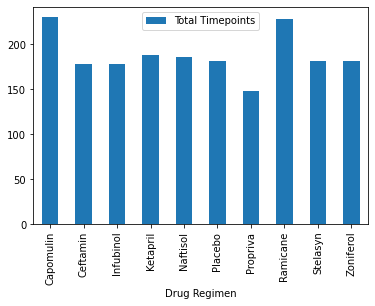

In [131]:
# ** Pandss DataFrame BAR CHART **
plot1_df.plot.bar()

<Figure size 1440x216 with 0 Axes>

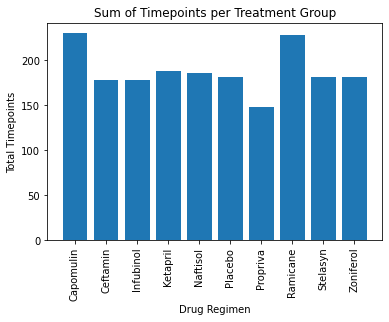

<Figure size 1440x216 with 0 Axes>

In [132]:
# ** Matplotlib BAR CHART **
plt.title('Sum of Timepoints per Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.bar(y_axis.index.values, y_axis.values) # this is the df that I had already generated that seemed to fit the df the AskBCS "counts =" generates
plt.xticks(x_axis, rotation=90)
plt.figure(figsize=(20,3))


# PIE CHARTS

In [133]:
# creating dataframe for pie charts
mice_gender_df = clean_mice_df.groupby(['Sex'])['Mouse ID'].nunique()

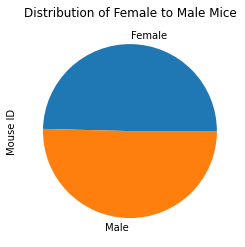

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_panda_pie = mice_gender_df.plot.pie(title= "Distribution of Female to Male Mice")
## HOW DO I REMOVE MOUSE ID?

Text(0.5, 1.0, 'Distribution of Female to Male Mice')

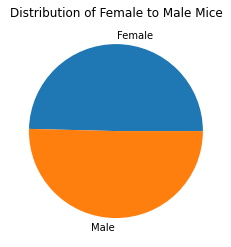

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
gender_counts = [(mice_gender_df[0]), mice_gender_df[1]]
plt.pie(gender_counts, labels= genders) 
# plt.axis("equal")  # ** GETTING TypeError: 'str' object is not callable
plt.title('Distribution of Female to Male Mice')

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [134]:
# last/greatest timepoint for each mouse
last_timepoint_df = clean_mice_df.groupby(['Mouse ID'])['Timepoint'].max()

In [135]:
# inner merge with clean_mice
final_time_df = pd.merge(clean_mice_df, last_timepoint_df, on=['Mouse ID','Timepoint'], how='inner')
final_time_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


# Where they want me to create a loop to pull data for the box plots, but I managed without, so if I have time I will attempt it.

In [136]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

In [137]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
chosen_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [138]:
# create empty list to fill with looping
tumor_volumes = []

# loops through drugs & gets important values
for drug in chosen_treatments:
    current_data = final_time_df[final_time_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_volumes.append(current_data)
    quartiles = round((current_data).quantile([.25,.5,.75]),2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)

    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"For {drug} values below {lower_bound} could be outliers.")
    print(f"For {drug} values above {upper_bound} could be outliers.")

    minvalue = round(current_data.min(),2)
    maxvalue = round(current_data.max(),2)
    print(f'The lowest value for {drug} is {minvalue} & the highest value is {maxvalue}.')

# added to make it easier to notice
    if minvalue < lower_bound:
        print(f'WAIT! {drug} might have an outlier on the lower end of your distribution. Your minimum ({minvalue}) is < the lower_bound ({lower_bound}).')
    if maxvalue > upper_bound:
        print(f'WAIT! {drug} might have an outlier at the upper end of your distribution. Your maximum ({maxvalue} is > the upper_bound ({upper_bound}).')

For Capomulin values below 20.71 could be outliers.
For Capomulin values above 51.83 could be outliers.
The lowest value for Capomulin is 23.34 & the highest value is 47.69.
For Ramicane values below 17.91 could be outliers.
For Ramicane values above 54.31 could be outliers.
The lowest value for Ramicane is 22.05 & the highest value is 45.22.
For Infubinol values below 36.83 could be outliers.
For Infubinol values above 82.75 could be outliers.
The lowest value for Infubinol is 36.32 & the highest value is 72.23.
WAIT! Infubinol might have an outlier on the lower end of your distribution. Your minimum (36.32) is < the lower_bound (36.83).
For Ceftamin values below 25.35 could be outliers.
For Ceftamin values above 87.67 could be outliers.
The lowest value for Ceftamin is 45.0 & the highest value is 68.92.


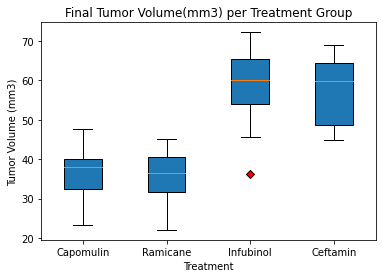

In [139]:
# general code found on matplotlib.org website
red_diamond = dict(markerfacecolor='r', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume(mm3) per Treatment Group')
ax7.set_xlabel('Treatment')
ax7.set_ylabel('Tumor Volume (mm3)')
ax7.boxplot(tumor_volumes, patch_artist=True, labels=chosen_treatments, flierprops=red_diamond)

plt.show()

In [140]:
tumor_volumes

[1      23.343598
 2      28.484033
 3      28.430964
 6      30.485985
 10     31.023923
 12     31.896238
 13     32.377357
 14     33.329098
 16     34.455298
 20     37.311846
 22     36.041047
 24     37.074024
 28     38.846876
 30     38.939633
 31     38.982878
 32     38.753265
 34     38.125164
 35     39.952347
 36     40.658124
 37     40.159220
 38     40.728578
 39     41.483008
 40     41.581521
 45     47.685963
 180    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49     67.973419
 50     65.525743
 57

# creating a new df using groupby so I can work on plots until I figure out how to get the for-loops to actually work

#Capomulin df sorted by tumor vol
capomulin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Capomulin', :]
capo_sorted_df = capomulin_df.sort_values("Tumor Volume (mm3)")

#Ramicane sorted by tumor volume
ramicane_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Ramicane', :]
rami_sorted_df = ramicane_df.sort_values("Tumor Volume (mm3)")

# Infubinol sorted by tumor volume
infubinol_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Infubinol', :]
infu_sorted_df = infubinol_df.sort_values("Tumor Volume (mm3)")

# Ceftamin sorted by tumor volume
ceftamin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Ceftamin', :]
ceft_sorted_df = ceftamin_df.sort_values("Tumor Volume (mm3)")

## Calculate the IQR and quantitatively determine if there are any potential outliers.

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# copied from in-class activity
# _Capomulin_
cap_quartiles = round(capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]),2)
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {cap_lowerq}")
print(f"The upper quartile of tumor volume is: {cap_upperq}")
print(f"The interquartile range of tumor volume is: {cap_iqr}")
print(f"The the median of tumor volume is: {cap_quartiles[0.5]} ")

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

cap_minvalue = round(capomulin_df['Tumor Volume (mm3)'].min(),2)
cap_maxvalue = round(capomulin_df['Tumor Volume (mm3)'].max(),2)
print(f'The lowest value is {cap_minvalue} & the highest value is {cap_maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if cap_minvalue < cap_lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({cap_minvalue}) is < the lower_bound ({cap_lower_bound}).')
if cap_maxvalue > cap_upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({cap_maxvalue} is > the upper_bound ({cap_upper_bound}).')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Ramicane_
ram_quartiles = round(ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]),2)
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = round(ram_upperq-ram_lowerq,2)

print(f"The lower quartile of tumor volume is: {ram_lowerq}")
print(f"The upper quartile of tumor volume is: {ram_upperq}")
print(f"The interquartile range of tumor volume is: {ram_iqr}")
print(f"The the median of tumor volume is: {ram_quartiles[0.5]} ")

ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr),2)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ram_minvalue = round(ramicane_df['Tumor Volume (mm3)'].min(),2)
ram_maxvalue = round(ramicane_df['Tumor Volume (mm3)'].max(),2)
print(f'The lowest value is {ram_minvalue} & the highest value is {ram_maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if ram_minvalue < ram_lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({ram_minvalue}) is < the lower_bound ({ram_lower_bound}).')
if ram_maxvalue > ram_upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({ram_maxvalue} is > the upper_bound ({ram_upper_bound}).')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Infubinol_
inf_quartiles = round(infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]),2)
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = round(inf_upperq-inf_lowerq,2)

print(f"The lower quartile of tumor volume is: {inf_lowerq}")
print(f"The upper quartile of tumor volume is: {inf_upperq}")
print(f"The interquartile range of tumor volume is: {inf_iqr}")
print(f"The the median of tumor volume is: {inf_quartiles[0.5]} ")

inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr),2)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

inf_minvalue = round(infubinol_df['Tumor Volume (mm3)'].min(),2)
inf_maxvalue = round(infubinol_df['Tumor Volume (mm3)'].max(),2)
print(f'The lowest value is {inf_minvalue} & the highest value is {inf_maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if inf_minvalue < inf_lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({inf_minvalue}) is < the lower_bound ({inf_lower_bound}).')
if inf_maxvalue > inf_upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({inf_maxvalue} is > the upper_bound ({inf_upper_bound}).')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# _Ceftamin_
cef_quartiles = round(ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75]),2)
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = round(cef_upperq-lowerq,2)

print(f"The lower quartile of tumor volume is: {cef_lowerq}")
print(f"The upper quartile of tumor volume is: {cef_upperq}")
print(f"The interquartile range of tumor volume is: {cef_iqr}")
print(f"The the median of tumor volume is: {cef_quartiles[0.5]} ")

cef_lower_bound = round(cef_lowerq - (1.5*cef_iqr),2)
cef_upper_bound = round(cef_upperq + (1.5*cef_iqr),2)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

cef_minvalue = round(ceftamin_df['Tumor Volume (mm3)'].min(),2)
cef_maxvalue = round(ceftamin_df['Tumor Volume (mm3)'].max(),2)
print(f'The lowest value is {cef_minvalue} & the highest value is {cef_maxvalue}.')

# added to make it easier to notice, especially because of length of decimals
if cef_minvalue < cef_lower_bound:
    print(f'WAIT! You might have an outlier on the lower end of your distribution. Your minimum ({cef_minvalue}) is < the lower_bound ({cef_lower_bound}).')
if cef_maxvalue > cef_upper_bound:
    print(f'WAIT! You might have an outlier at the upper end of your distribution. Your maximum ({cef_maxvalue} is > the upper_bound ({cef_upper_bound}).')

# Generate a BOX PLOT of the final tumor volume of each mouse across four regimens of interest

# Capomulin tumor values
capo_tumors = capo_sorted_df['Tumor Volume (mm3)']

# Ramicane tumor values
rami_tumors = rami_sorted_df['Tumor Volume (mm3)']

# Infubinol tumor values
infu_tumors = infu_sorted_df['Tumor Volume (mm3)']

# Ceftamin tumor values
ceft_tumors = ceft_sorted_df['Tumor Volume (mm3)']

data = [capo_tumors, rami_tumors, infu_tumors, ceft_tumors]

labels = chosen_treatments

# general code found on matplotlib.org website
red_diamond = dict(markerfacecolor='r', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume(mm3) per Treatment Group')
ax7.set_xlabel('Treatment')
ax7.set_ylabel('Tumor Volume (mm3)')
ax7.boxplot(data, patch_artist=True, labels=labels, flierprops=red_diamond)

plt.show()

# Line and Scatter Plots

### Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [143]:
# dataframe for capomulin only
capomulin_df = final_time_df.loc[final_time_df['Drug Regimen'] == 'Capomulin', :]

In [144]:
# choosing a mouse from capomulin -- only choosing from mice that made it to the final time point so there is more to plot
capo_winners_df = capomulin_df.loc[capomulin_df['Timepoint'] == 45, :]
capo_winners_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2
22,w914,Capomulin,Male,24,21,45,36.041047,2


In [145]:
# choosing mouse j119 -- need to pull that data from the full data frame
j119_df = clean_mice_df.loc[clean_mice_df['Mouse ID'] == 'j119', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
328,j119,Capomulin,Female,7,23,0,45.000000,0
329,j119,Capomulin,Female,7,23,5,45.838998,0
330,j119,Capomulin,Female,7,23,10,46.425366,0
331,j119,Capomulin,Female,7,23,15,47.322984,0
332,j119,Capomulin,Female,7,23,20,48.158209,1
333,j119,Capomulin,Female,7,23,25,42.417166,1
334,j119,Capomulin,Female,7,23,30,43.013681,1
335,j119,Capomulin,Female,7,23,35,43.765705,1
336,j119,Capomulin,Female,7,23,40,44.585090,1
337,j119,Capomulin,Female,7,23,45,38.125164,1


In [146]:
# timepoints for mouse j119
x_axis_j119 = j119_df['Timepoint']

In [147]:
# tumor volumes for mouse j119
points_j119 = j119_df['Tumor Volume (mm3)']

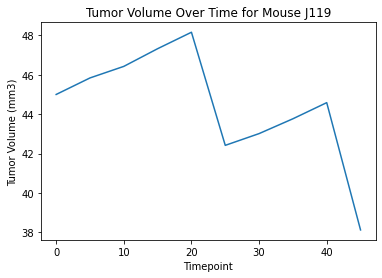

In [148]:
plt.plot(x_axis_j119, points_j119)
plt.title('Tumor Volume Over Time for Mouse J119')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [149]:
# final weight on capomulin
weight = capomulin_df['Weight (g)']

In [150]:
# final tumor volume on capomulin
tumor_vol = capomulin_df['Tumor Volume (mm3)']

Text(0, 0.5, 'Tumor Volume (mm3)')

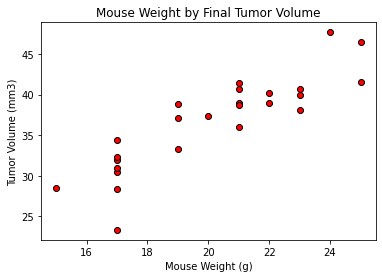

In [151]:
plt.scatter(weight, tumor_vol, marker='o', facecolors='red', edgecolors='black')
plt.title('Mouse Weight by Final Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

* Calculate the correlation coefficient and linear regression model 
* for mouse weight and average tumor volume for the Capomulin regimen

In [153]:
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


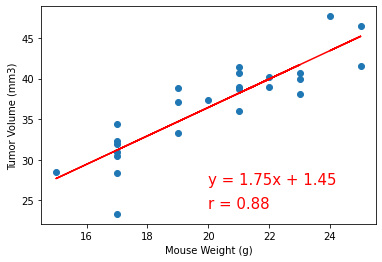

In [154]:
x_values = weight
y_values = tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,27),fontsize=15,color="red")
plt.annotate(f'r = {round(correlation[0],2)}', (20,24),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()